# Static Mapping: Car Data

As a brief introduction into static mapping, this quick demonstration uses perceptual attribute ratings to 
uncover competing cars' relative positioning.

## Background

The data is taken from the following book (with slight modifications): 
```
[1] Lilien, G. L., & Rangaswamy, A. (2004). Marketing engineering: computer-assisted marketing analysis and planning (2nd revised edition). DecisionPro.
```

**Last updated:** June 2022


Read the **full paper** here (open access): <a href = 'https://doi.org/10.1287/mksc.2022.1385'>https://doi.org/10.1287/mksc.2022.1385</a>

**Contact:** For questions or feedback, please <a href = 'mailto:matthe@wiwi.uni-frankfurt.de'>get in touch</a>.

## Loading Example Data

The data for this example consist of two files: 

- 'attributes':  Perceptual attribute ratings for competing cars
- 'preferences': Customer preference ratings for these cars

Both files are included within the `evomap.datasets` module. 

In [1]:
from evomap.datasets import load_car_data
data = load_car_data()
df_attributes = data['attributes']
df_preferences = data['preferences']

We start by inspecting the attribute data. These data include attribute ratings for the following 10 competing cars:

In [2]:
car_labels = df_attributes.index
car_labels

Index(['G20', 'Ford_T_Bird', 'Audi_90', 'Toyota_Supra', 'Eagle_Talon',
       'Honda_Prelude', 'Saab_900', 'Pontiac_Firebird', 'BMW_318i',
       'Mercury_Capri'],
      dtype='object', name='Car')

Each car has been rated along 15 perceptual attributes.

In [3]:
df_attributes.columns

Index(['Attractive', 'Quiet', 'Unreliable', 'Poorly.Built', 'Interesting',
       'Sporty', 'Uncomfortable', 'Roomy', 'Easy.to.Service', 'High.Prestige',
       'Common', 'Economical', 'Successful', 'Avant.garde', 'Poor.Value'],
      dtype='object')

Each attribute value represents averages of a customer survey:

In [4]:
df_attributes.loc['G20']

Attractive         5.6
Quiet              6.3
Unreliable         2.9
Poorly.Built       1.6
Interesting        3.6
Sporty             4.1
Uncomfortable      3.2
Roomy              4.2
Easy.to.Service    4.6
High.Prestige      5.4
Common             3.5
Economical         3.6
Successful         5.3
Avant.garde        4.3
Poor.Value         3.4
Name: G20, dtype: float64

## Derive Car Positioning

To project these 15-dimensional vectors for each car onto the two-dimensional plane, we can use Classical Multidimensional Scaling (CMDS). 
CMDS, also known as Principal Coordinates Analysis, takes a matrix of pairwise distances, and creates a low-dimensional configuration of points via Eigendecomposition of the distance matrix. 

Thus, as a first step, construct a pairwise distance matrix:

In [5]:
from evomap.preprocessing import calc_distances
dist_mat = calc_distances(df_attributes)
dist_mat.round(2)

array([[0.  , 5.28, 2.93, 3.48, 5.75, 2.7 , 3.11, 6.08, 2.29, 5.59],
       [5.28, 0.  , 4.42, 4.75, 2.28, 4.35, 4.98, 1.82, 5.67, 1.97],
       [2.93, 4.42, 0.  , 4.58, 5.25, 3.76, 2.76, 5.39, 3.21, 5.1 ],
       [3.48, 4.75, 4.58, 0.  , 5.46, 3.51, 3.95, 4.73, 3.41, 4.91],
       [5.75, 2.28, 5.25, 5.46, 0.  , 4.26, 5.35, 3.01, 6.19, 0.99],
       [2.7 , 4.35, 3.76, 3.51, 4.26, 0.  , 3.27, 5.12, 3.07, 4.19],
       [3.11, 4.98, 2.76, 3.95, 5.35, 3.27, 0.  , 5.9 , 2.69, 5.07],
       [6.08, 1.82, 5.39, 4.73, 3.01, 5.12, 5.9 , 0.  , 6.34, 2.49],
       [2.29, 5.67, 3.21, 3.41, 6.19, 3.07, 2.69, 6.34, 0.  , 5.85],
       [5.59, 1.97, 5.1 , 4.91, 0.99, 4.19, 5.07, 2.49, 5.85, 0.  ]])

Then, apply CMDS to this matrix. Syntax follows the `scikit-learn` library:

First, you intialize the model. Then, you `fit()` it to data. `fit_transform()` directly returns the resultant output (in this case: a two-dimensional array of map coordinates). 

In [6]:
from evomap.mapping import CMDS
map_coords = CMDS(n_dims= 2).fit_transform(dist_mat)
map_coords.round(2)

array([[-2.54,  0.04],
       [ 2.43, -0.3 ],
       [-1.53, -1.68],
       [-1.09,  2.61],
       [ 2.9 , -0.79],
       [-1.  ,  0.11],
       [-2.01, -0.98],
       [ 3.1 ,  0.95],
       [-2.96,  0.27],
       [ 2.71, -0.23]])

The resultant coordinates can then be visualized in a 2D map

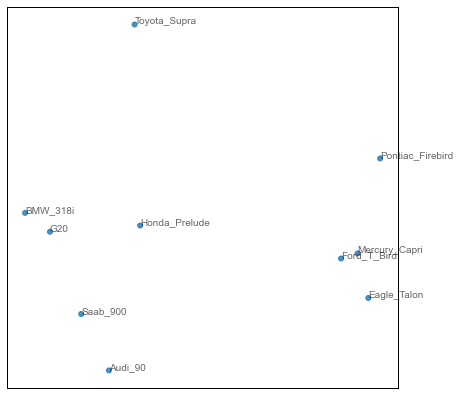

In [7]:
from evomap.printer import draw_map
import numpy as np
map = draw_map(
    map_coords, 
    labels = car_labels, 
    fig_size = (7,7))
map

## Explain Positioning via Property Fitting

The map already reveals which pairs of products compete strongly vs. weakly.
A natural next question is: What drives these positions? I.e., how do these map positions relate to the competing cars' perceptual attributes?

To answer this question, `evomap` allows to fit attributes to the derived map positions (and visualize their relationship via vectors)

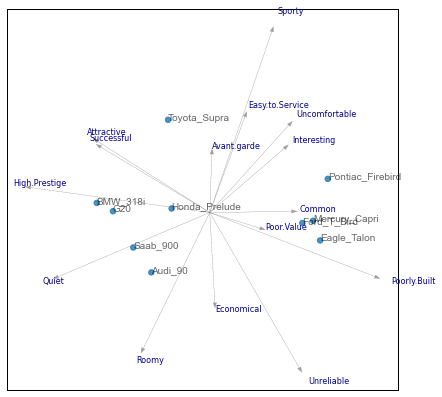

In [8]:
from evomap.printer import fit_attributes
map = draw_map(
    map_coords, 
    labels = car_labels, 
    fig_size = (7,7),
    size = 30)

map = fit_attributes(map_coords, df_attributes, map)
map

From this map, it becomes apparant what differentiates the competing car brands from one another.